# SKLearn : Inspection

#### Permutation Importance
Permutation importance is geenerally used in feature evaluation. It is defined to be the 
decrease in a model score when a single feature value is randomly shuffled. 

Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

https://scikit-learn.org/stable/modules/permutation_importance.html


https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

1. Example 1 :  Toy Data

2. Example 2 :  California Data

3. Example 3 :  IRIS Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
from sklearn import tree 
from sklearn.inspection import permutation_importance

In [4]:
%matplotlib inline

## Example 1 : Toy Data

#### Regression

In [5]:
X = np.array([[0.0, 0.1, 2.1], [1.0, 0.5, 3.0], [2.0, 1.0, 3.5]])
y = np.array([0, 1, 2.5])

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor(n_estimators=1, max_depth=1, random_state=None)
rgr.fit(X, y)


pimp = permutation_importance(
    rgr, 
    X, 
    y, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( pimp.importances_mean )
print( pimp.importances_std )

[0.         0.20842105 0.        ]
[0.        0.1413665 0.       ]


In [7]:
from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor(max_depth=1, random_state=None)
rgr.fit(X, y)

pimp = permutation_importance(
    rgr, 
    X, 
    y, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( pimp.importances_mean )
print( pimp.importances_std )

[1.70526316 0.         0.        ]
[1.23279292 0.         0.        ]


In [8]:
print( rgr.tree_.threshold )
print( rgr.tree_.feature )

[ 1.5 -2.  -2. ]
[ 0 -2 -2]


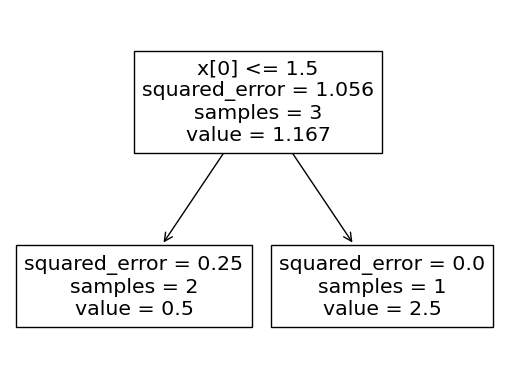

In [9]:
tree.plot_tree(rgr)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()
rgr.fit(X,y)

pimp = permutation_importance(
    rgr, 
    X, 
    y, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( pimp.importances_mean )
print( pimp.importances_std )

[3.56260474 0.4580919  0.83045074]
[1.24665197 0.16006569 0.28796714]


#### Classification

In [11]:
X = np.array([[0.0,0.1,2.1], [1.0,0.5,3.0], [2.0,1.0,3.5]])
y = np.array([0,1,1])

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1, max_depth=1, random_state=None)
clf.fit(X, y)

pimp = permutation_importance(
    clf, 
    X, 
    y, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( pimp.importances_mean )
print( pimp.importances_std )

[0. 0. 0.]
[0. 0. 0.]


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1, random_state=None)
clf.fit(X,y)

pimp = permutation_importance(
    clf, 
    X, 
    y, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( pimp.importances_mean )
print( pimp.importances_std )

[0.26666667 0.         0.        ]
[0.32659863 0.         0.        ]


In [14]:
print( clf.tree_.threshold )
print( clf.tree_.feature )

[ 0.5 -2.  -2. ]
[ 0 -2 -2]


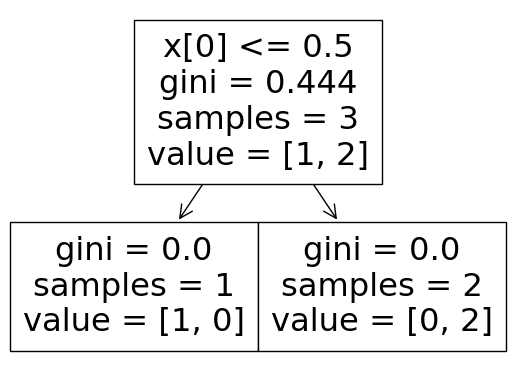

In [15]:
tree.plot_tree(clf)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

pimp = permutation_importance(
    clf, 
    X, 
    y, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( pimp.importances_mean )
print( pimp.importances_std )

[0.16666667 0.         0.16666667]
[0.16666667 0.         0.16666667]


## Example 2 : SKLearn California Housing Data

#### Regression

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [18]:
cal_housing = fetch_california_housing(return_X_y=False)
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [19]:
# print(X.shape)
# print(X.columns)
# print( pd.Series(cal_housing.target).describe())

### Model 1 : MLPRegressor

In [20]:
y -= y.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [21]:
### Model 1 : MLPRegressor

In [22]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import PartialDependenceDisplay

In [23]:
print("Training MLPRegressor ...")
start_tic = time()

est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)

est.fit(X_train, y_train)

end_tic  = time()
print(f"Fitting done in {end_tic - start_tic:0.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor ...
Fitting done in 2.851s
Test R2 score: 0.81


In [24]:
pimp = permutation_importance(
    est, 
    X_test, 
    y_test, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( [round(x,4) for x in pimp.importances_mean] )
print( [round(x,4) for x in pimp.importances_std] )

[0.4963, 0.0477, 0.1067, 0.0074, 0.0073, 0.1697, 2.328, 1.9619]
[0.0108, 0.0042, 0.0078, 0.0012, 0.0018, 0.0042, 0.0556, 0.0605]


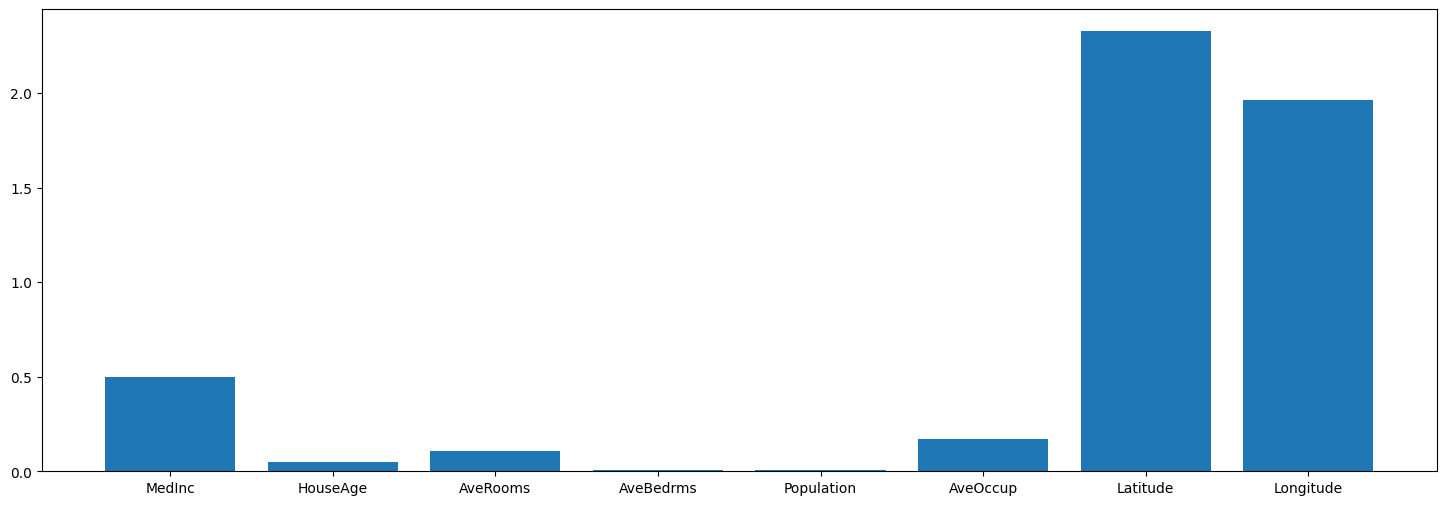

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

ax.bar(X.columns, pimp.importances_mean)

plt.show()

### Model 2 : HistGradientBoostingRegressor

In [26]:
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()

est = HistGradientBoostingRegressor(random_state=0)
est.fit(X_train, y_train)

print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 1.160s
Test R2 score: 0.85


In [27]:
pimp = permutation_importance(
    est, 
    X_train, 
    y_train, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( [round(x,4) for x in pimp.importances_mean] )
print( [round(x,4) for x in pimp.importances_std] )

[0.5612, 0.0493, 0.0532, 0.0116, 0.012, 0.1642, 0.8699, 0.7054]
[0.0045, 0.0013, 0.0008, 0.0003, 0.0003, 0.0024, 0.0063, 0.0057]


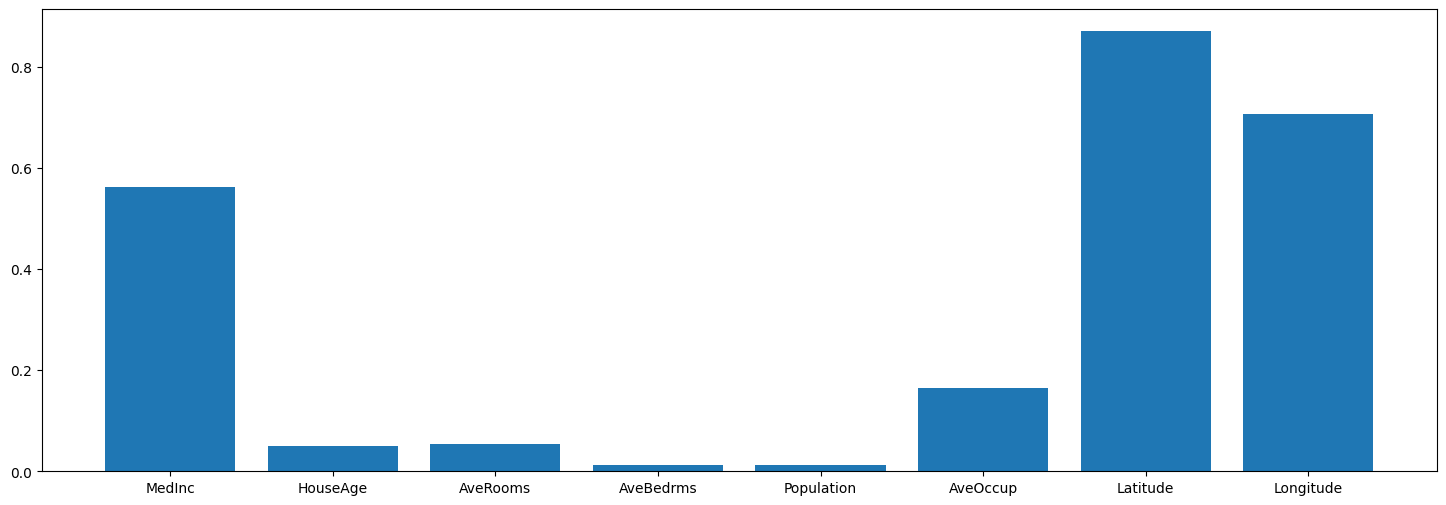

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

ax.bar(X.columns, pimp.importances_mean)

plt.show()

## Example 3 : SKLearn IRIS Data

####  Classification 

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

clf = GradientBoostingClassifier(
    n_estimators=1,
    max_depth=1)

clf.fit(iris.data, iris.target)

GradientBoostingClassifier(max_depth=1, n_estimators=1)

[0.0, 0.0, 0.098, 0.6073]
[0.0, 0.0, 0.0189, 0.0232]


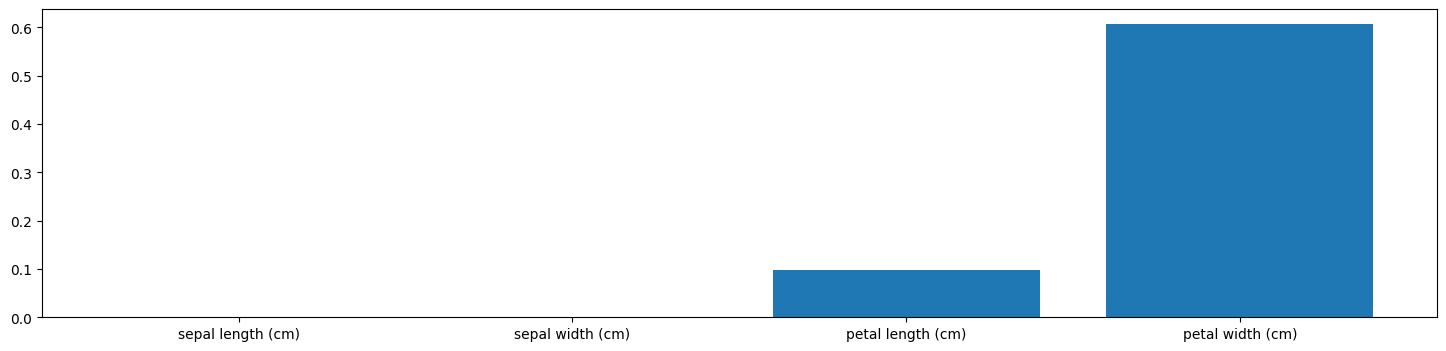

In [30]:
fig, ax = plt.subplots(1,1, figsize=(18,4))

pimp = permutation_importance(
    clf, 
    iris.data, 
    iris.target, 
    n_repeats=10,
    random_state=None)


# print( pimp.importances, '\n')
print( [round(x,4) for x in pimp.importances_mean] )
print( [round(x,4) for x in pimp.importances_std] )

ax.bar(iris.feature_names, pimp.importances_mean)

plt.show()